In [1]:
from pycbc.waveform import get_td_waveform
from pycbc.types import TimeSeries
import numpy as np
import matplotlib.pyplot as plt
import ringdown.qnms
import makefun
from scipy.optimize import curve_fit
import statistics
import pandas as pd
import matplotlib.lines as mlines

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [8]:
# define what modes to use
def rd_fun(modes=[(2,2,0),(2,2,1)]):
    #create function signature
    func_signature="rngdwn_multi_modes(time,M,chi"
    # loop through defined modes
    for mode in modes:
        l,m,n = mode
        func_signature+= f",a{l}{m}{n},phi{l}{m}{n}"
    func_signature+=")"
    # kwargs = a220, phi220, a221, phi221, ...
    def new_fun(time,M,chi,**kwargs):
        # creating empty time array to hold rngdwn() return
        ex = np.zeros(time.shape)
        # loop through defined modes
        for mode in modes:
            l,m,n=mode
            amplitude=kwargs[f"a{l}{m}{n}"]
            phi=kwargs[f"phi{l}{m}{n}"]
            # add back to empty time array  
            ex += rngdwn(time,M,chi,l,m,n,amplitude,phi)
            #print(time,M,chi,kwargs)
        # return ex to have combined signal for all defined modes
        return ex
    # this fx now looks like what scipy.curve_fit expects...
    return makefun.create_function(func_signature,new_fun)

# let "test = rd_fun" // test now takes inputs of (time,M,chi,a220,phi220,a221,phi221) --> curve_fit can play with
test = rd_fun(modes=[(2,2,0),(2,2,1),(2,2,2),
                     (3,2,0),(3,2,1),(3,2,2),
                     (3,3,0),(3,3,1),(3,3,2)])


def rngdwn(time,M,chi,l,m,n,amplitude,phi):
    # using get_ftau to retrieve frequency and damping time for given values (ftau = [freq, tau])
    ftau = ringdown.qnms.get_ftau(M,chi,n,l,m)
    gamma = (ftau[1])**-1
    t0=0
        
    wf_kws = dict(
    A = amplitude,
    phi = phi,
    f = ftau[0],                                                            
    gamma = gamma,                                                          
    )
        
    def get_signal(time, A, phi, f, gamma):
        # generate sinusoid
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)
    
    return signal


def plot_ringdown(x0,xdata,ydata,p0,bounds):  

    popt,pcov = curve_fit(x0,xdata,ydata,p0,bounds=bounds)    
    fig1, ax1 = plt.subplots(figsize=(10,4))
    ax2 = ax1.twiny()
    ax1.set_xlim(0,.03)
    ax2.set_xlim(0,.03)
    ax1.set_xlabel('Time (s)',fontsize=20)
    ax1.set_ylabel('Strain',fontsize=20)
    ax2.set_frame_on(False)             
    ax2.get_xaxis().tick_bottom()           
    ax2.axes.get_xaxis().set_visible(False)
    ax1.tick_params(axis='both',labelsize=15)
    ax2.tick_params(axis='both',labelsize=15)

    ax1.plot(xdata, ydata, label='IMRPhenomXPHM Plus',c='blue')
    ax2.plot(xdata, test(xdata, *popt),label='scipy.curve_fit',c='orange')
    ax1.legend(bbox_to_anchor=(1, 1),loc='upper right',fontsize=15)
    ax2.legend(bbox_to_anchor=(1, .85),loc='upper right',fontsize=15)
    
    return popt


def two_two_zero(time,M,chi,a220,phi220):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,0,2,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a220,
    phi = phi220,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def two_two_one(time,M,chi,a221,phi221):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,1,2,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a221,
    phi = phi221,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def two_two_two(time,M,chi,a222,phi222):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,2,2,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a222,
    phi = phi222,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def three_three_zero(time,M,chi,a330,phi330):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,0,3,3)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a330,
    phi = phi330,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal

In [3]:
# making large bound arrays for function input
gb = np.array([1e-4, np.pi])
guess_bounds = np.tile(gb, 9)
m_chi = [62,0.68]
con = np.concatenate((m_chi, guess_bounds))
#lower bounds
lower = np.array([1e-6, 0])
lower_bound = np.tile(lower, 9)
m_chi_lower = [50,0.3]
con_lower = np.concatenate((m_chi_lower,lower_bound))
#upper bounds
upper = np.array([1e-3, 2*np.pi])
upper_bound = np.tile(upper, 9)
m_chi_upper = [95, 0.85]
con_upper = np.concatenate((m_chi_upper, upper_bound))

In [4]:
def XPHMringdown_plots(mass1,mass2,spin1x,spin1y,spin1z,spin2x,spin2y,spin2z,x0,p0,bounds):
    inclination = [0, np.pi/6, np.pi/3, np.pi/2]
    df_list=[]
    for i in inclination:        
        hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                                 mass1=mass1,
                                 mass2=mass2,
                                 delta_t=1.0/16384,
                                 f_lower=30,
                                 distance=1e-14,
                                 inclination=i,
                                 spin1x=spin1x,
                                 spin1y=spin1y,
                                 spin1z=spin1z,
                                 spin2x=spin2x,
                                 spin2y=spin2y,
                                 spin2z=spin2z)

        # sample times ---> timeseries
        hp_smp_ts = TimeSeries(hp.sample_times, delta_t=1/16384, epoch=0)
        cond = hp_smp_ts.crop(0.645,0)                                      

        # h+/hx data ---> timeseries
        hp_data = TimeSeries(hp, delta_t=1/16384, epoch=0)  
        cond_hp = hp_data.crop(0.645,0)
        hp_signal = cond_hp.numpy()                  

        # repeat
        hc_data = TimeSeries(hc, delta_t=1/16384, epoch=0)              
        cond_hc = hc_data.crop(0.645,0)
        hc_signal = cond_hc.numpy()                                         

        # use for hp+hc ringdown analysis
        time = cond.numpy()             
        
        x0 = x0
        xdata = time
        ydata = cond_hp
        p0 = p0
        bounds = bounds
        a = plot_ringdown(x0,xdata,ydata,p0,bounds)
        
        my_dict = dict()
        for ind, v in enumerate(a):
            my_dict[ind] = [v]
    
        temp_df = pd.DataFrame.from_dict(my_dict)
        temp_df.columns = ["mass", "chi",
                      "a220","phi220",
                      "a221","phi221",
                      "a222","phi222",
                      "a320","phi320",
                      "a321","phi321",
                      "a322","phi322",
                      "a330","phi330",
                      "a331","phi331",
                      "a332","phi332"]
        df_list += [temp_df]
        
        I = mlines.Line2D([],[],color='white', label=f'Inclination:{i}')
        M1 = mlines.Line2D([],[],color='white', label=f'M1:{mass1}')
        M2 = mlines.Line2D([],[],color='white', label=f'M2:{mass2}')
        SPIN1 = mlines.Line2D([],[],color='white', label=f'Spin1(x,y,z):{spin1x},{spin1y},{spin1z}')
        SPIN2 = mlines.Line2D([],[],color='white', label=f'Spin2(x,y,z):{spin2x},{spin2y},{spin2z}')
        plt.legend(handles=[I,M1,M2,SPIN1,SPIN2],loc='lower right',frameon=False,fontsize=12)
        
    df = pd.concat(df_list,ignore_index=True)
        
    return df

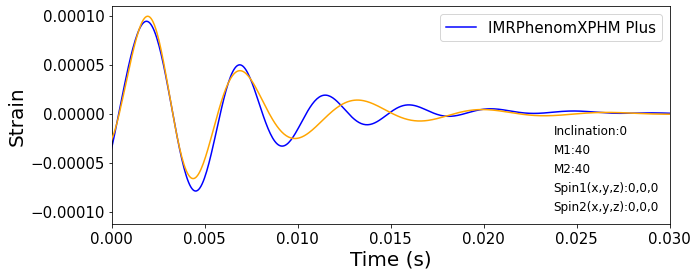

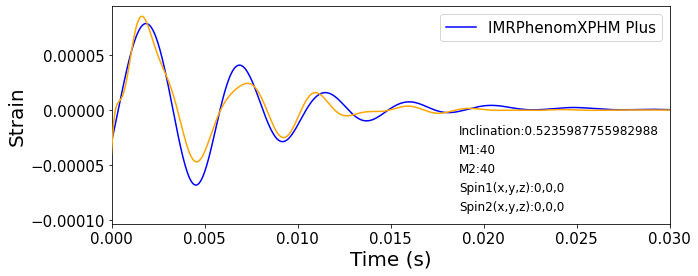

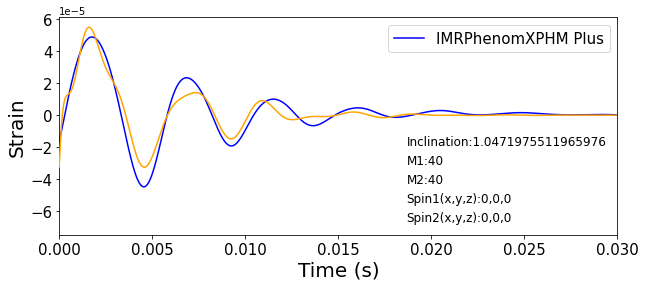

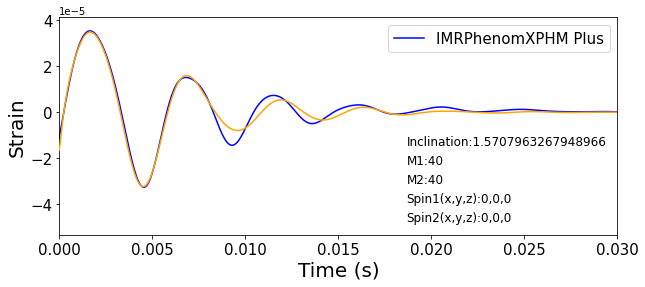

In [6]:
equalmass_nospin = XPHMringdown_plots(40,40,0,0,0,0,0,0,test,con,(con_lower,con_upper))

(array([-1.25e-04, -1.00e-04, -7.50e-05, -5.00e-05, -2.50e-05,  0.00e+00,
         2.50e-05,  5.00e-05,  7.50e-05,  1.00e-04,  1.25e-04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

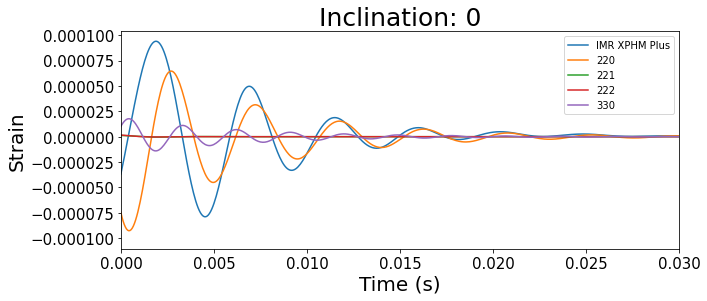

In [11]:
#plotting IMR with individual modes

hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                            mass1=40,
                            mass2=40,
                            delta_t=1.0/16384,
                            f_lower=30,
                            distance=1e-14,
                            inclination=0,
                            spin1x=0,
                            spin1y=0,
                            spin1z=0,
                            spin2x=0,
                            spin2y=0,
                            spin2z=0)

# sample times ---> timeseries
hp_smp_ts = TimeSeries(hp.sample_times, delta_t=1/16384, epoch=0)
cond = hp_smp_ts.crop(0.645,0)                                      

# h+/hx data ---> timeseries
hp_data = TimeSeries(hp, delta_t=1/16384, epoch=0)  
cond_hp = hp_data.crop(0.645,0)
hp_signal = cond_hp.numpy()                  

# repeat
hc_data = TimeSeries(hc, delta_t=1/16384, epoch=0)              
cond_hc = hc_data.crop(0.645,0)
hc_signal = cond_hc.numpy()                                         

# use for hp+hc ringdown analysis
time = cond.numpy()             
    
x = two_two_zero(time,91,.85,1e-4,2.43)
y = two_two_one(time,91,.85,1.2e-6,6.3)
z = two_two_two(time,91,.85,1.6e-6,6.3)
a = three_three_zero(time,91,.85,1.9e-5,5.3)
    
plt.figure(figsize=(10,4))
plt.plot(cond, cond_hp, label='IMR XPHM Plus')
plt.plot(x,label='220')
plt.plot(y,label='221')
plt.plot(z,label='222')
plt.plot(a,label='330')
plt.xlim(0, 0.03)
plt.legend()
plt.title('Inclination: 0',fontsize=25)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Strain',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

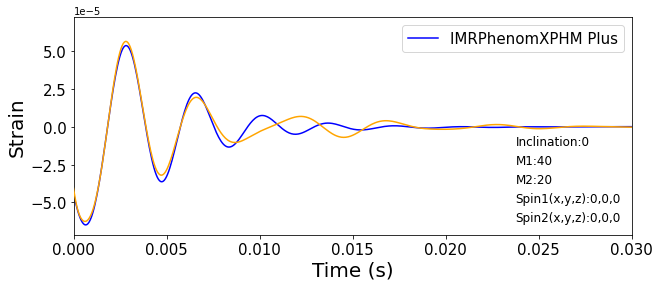

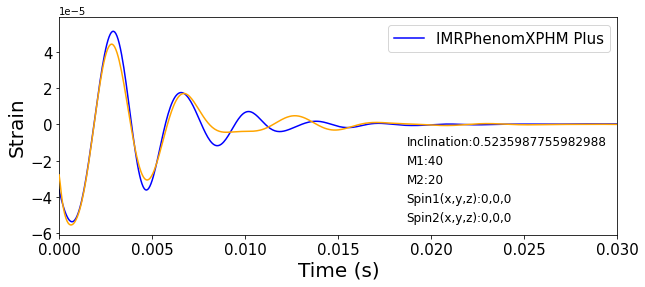

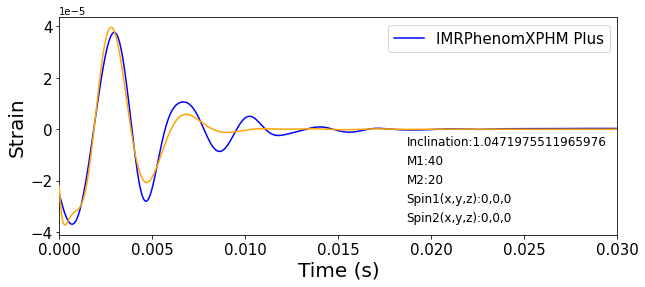

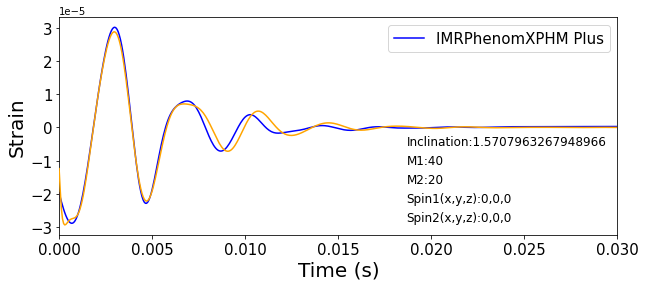

In [13]:
unequalmass_nospin = XPHMringdown_plots(40,20,0,0,0,0,0,0,test,con,(con_lower,con_upper))